Christian Hansen
Spanish A/B

In [1]:
ls

Translation_Test.zip  test_table.csv
spanish_AB.ipynb      user_table.csv


# SPANISH TRANSLATION A/B TEST

A/B tests play a huge role in website optimization. Analyzing A/B tests data is a very important data scientist responsibility. Especially, data scientists have to make sure that results are reliable, trustworthy, and conclusions can be drawn.
Furthermore, companies often run tens, if not hundreds, of A/B tests at the same time. Manually analyzing all of them would require lot of time and people. Therefore, it is common practice to look at the typical A/B test analysis steps and try to automate as much as possible. This frees up time for the data scientists to work on more high level topics.
In this challenge, you will have to analyze results from an A/B test. Also, you will be asked to design an algorithm to automate some steps.

## Challenge Description
Company XYZ is a worldwide e-commerce site with localized versions of the site.
A data scientist at XYZ noticed that Spain-based users have a much higher conversion rate than any other Spanish-speaking country. She therefore went and talked to the international team in charge of Spain And LatAm to see if they had any ideas about why that was happening.
Spain and LatAm country manager suggested that one reason could be translation. All Spanish- speaking countries had the same translation of the site which was written by a Spaniard. They agreed to try a test where each country would have its one translation written by a local. That is, Argentinian users would see a translation written by an Argentinian, Mexican users by a Mexican and so on. Obviously, nothing would change for users from Spain.
After they run the test however, they are really surprised cause the test is negative. I.e., it appears that the non-localized translation was doing better!
You are asked to:
- Confirm that the test is actually negative. That is, it appears that the old version of the site with just one translation across Spain and LatAm performs better
- Explain why that might be happening. Are the localized translations really worse?
- If you identified what was wrong, design an algorithm that would return FALSE if the same problem is happening in the future and TRUE if everything is good and the results can be trusted.


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
test_df = pd.read_csv('test_table.csv')

In [4]:
user_df = pd.read_csv('user_table.csv')

In [5]:
test_df.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1


In [6]:
user_df.head()

,user_id,sex,age,country
0,765821,M,20,Mexico
1,343561,F,27,Nicaragua
2,118744,M,23,Colombia
3,987753,F,27,Venezuela
4,554597,F,20,Spain


In [7]:
test_df.describe()

,user_id,conversion,test
count,453321.000000,453321.000000,453321.000000
mean,499937.514728,0.049579,0.476446
std,288665.193436,0.217073,0.499445
min,1.000000,0.000000,0.000000
25%,249816.000000,0.000000,0.000000
50%,500019.000000,0.000000,0.000000
75%,749522.000000,0.000000,1.000000
max,1000000.000000,1.000000,1.000000


In [8]:
user_df.describe()

,user_id,age
count,452867.000000,452867.000000
mean,499944.805166,27.130740
std,288676.264784,6.776678
min,1.000000,18.000000
25%,249819.000000,22.000000
50%,500019.000000,26.000000
75%,749543.000000,31.000000
max,1000000.000000,70.000000


In [9]:
# lets merge the two datasets

In [10]:
test_df['user_id'].shape[0]*1.0/test_df['user_id'].unique().shape[0]

1.0

In [11]:
user_df['user_id'].shape[0]*1.0/user_df['user_id'].unique().shape[0]

1.0

In [12]:
user_df.shape[0]-test_df.shape[0]

-454

In [13]:
test_user_df = pd.merge(test_df,user_df, how = 'left')

In [14]:
test_user_df.shape

(453321, 12)

# Starting with EDA of the table

//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


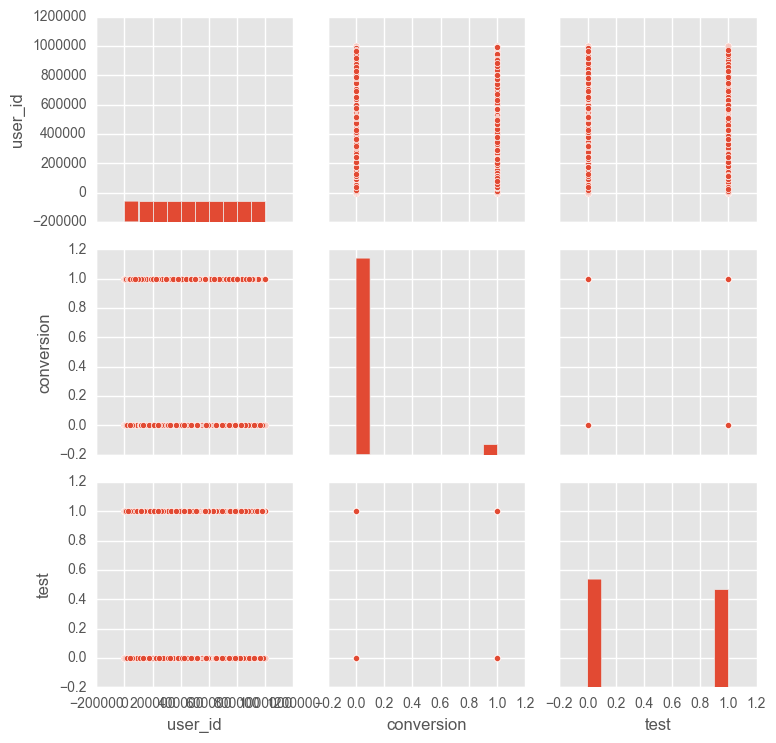

In [15]:
sns.pairplot(test_df)

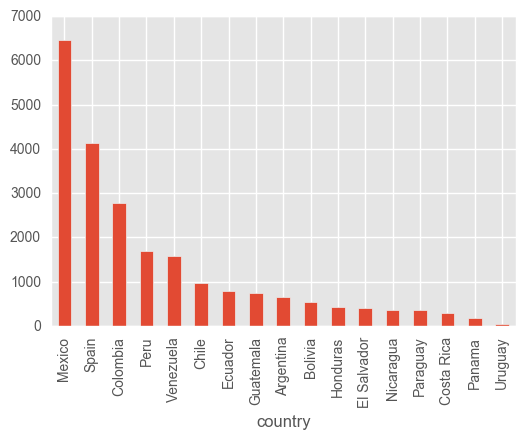

In [16]:
test_user_df.groupby('country').sum()['conversion'].sort_values(ascending=False).plot(kind='bar')

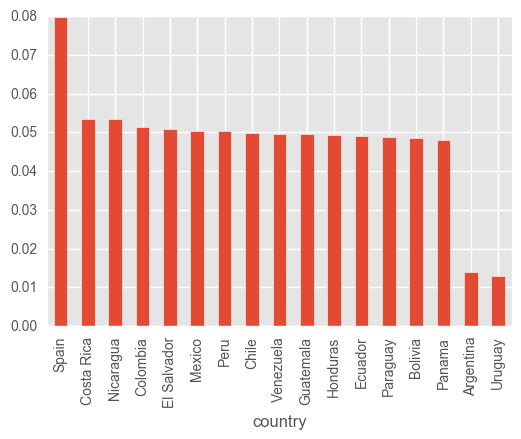

In [17]:
test_user_df.groupby('country').mean()['conversion'].sort_values(ascending=False).plot(kind='bar')

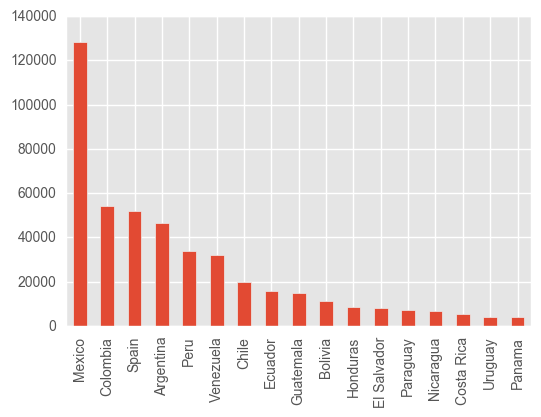

In [18]:
test_user_df['country'].value_counts().plot(kind='bar')

In [19]:
test_user_df.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0,M,32.0,Spain
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21.0,Mexico
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0,M,34.0,Spain
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22.0,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19.0,Mexico


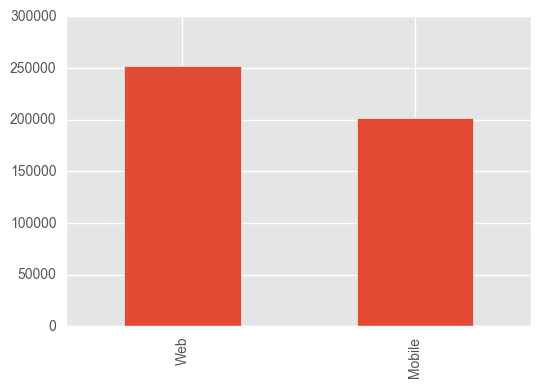

In [20]:
test_user_df['device'].value_counts().plot(kind ='bar')

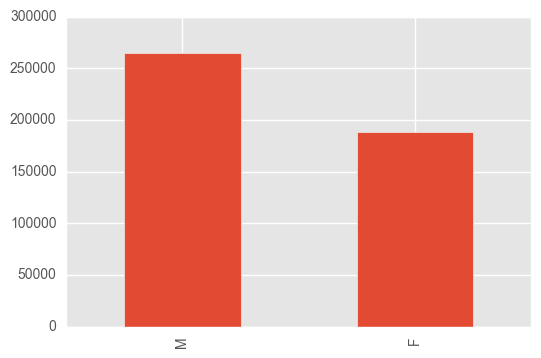

In [21]:
test_user_df['sex'].value_counts().plot(kind ='bar')

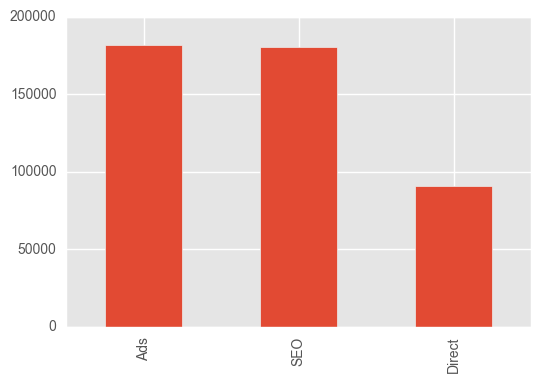

In [22]:
test_user_df['source'].value_counts().plot(kind ='bar')

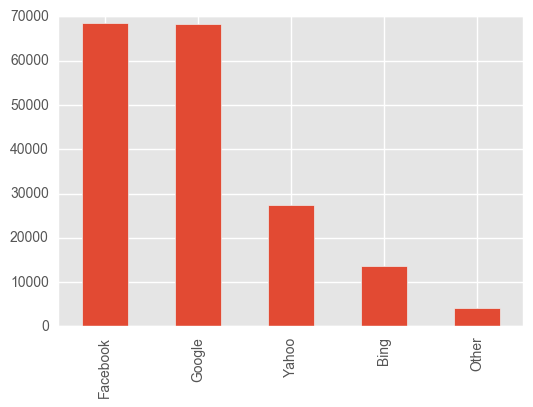

In [23]:
test_user_df['ads_channel'].value_counts().plot(kind ='bar')

In [135]:
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr
import numpy as np

def a_b_test(dist_a,dist_b):
    np.random.seed(1)
    # Create sample data.
    a = dist_a
    b = dist_b

    # Use scipy.stats.ttest_ind.
    t, p = ttest_ind(a, b, equal_var=False,nan_policy='omit')
    print('If the P-value is greater than alpha: 0.05, do not reject the null hypothesis.')
    alpha = 0.05
    
    print("ttest_ind:  t = %g  p = %g" % (t, p))
    if p < alpha:
        print('Reject null hypothesis')
    else:
        print('Do not reject null hypothesis')

    return(t,p)

In [136]:
test_group = test_user_df[test_user_df['test']==1]['conversion']
control_group = test_user_df[test_user_df['test']==0]['conversion']
a_b_test(control_group,test_group)

If the P-value is greater than alpha: 0.05, do not reject the null hypothesis.
ttest_ind:  t = 18.3123  p = 7.03078e-75
Reject null hypothesis


(18.312271285740266, 7.0307767443126773e-75)

In [137]:
test_group.mean(),control_group.mean()

(0.043424713982118966, 0.055178690306651276)

Lets take out Spain

In [138]:
spain_out_test_df = test_user_df[test_user_df['country']!= 'Spain']
s_test_group = spain_out_test_df[spain_out_test_df['test']==1]['conversion']
s_control_group = spain_out_test_df[spain_out_test_df['test']==0]['conversion']
a_b_test(s_test_group,s_control_group)

If the P-value is greater than alpha: 0.05, do not reject the null hypothesis.
ttest_ind:  t = -7.39394  p = 1.4283e-13
Reject null hypothesis


(-7.3939374121344805, 1.4282994754055316e-13)

In [139]:
s_test_group.mean(),s_control_group.mean()

(0.043424713982118966, 0.04833042316066309)

Lets look at time series

In [140]:
test_spain = spain_out_test_df[spain_out_test_df['test']==1]
control_spain =spain_out_test_df[spain_out_test_df['test']==0]

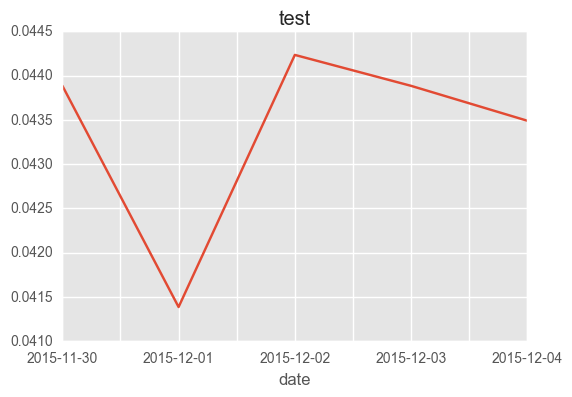

In [141]:
test_spain.groupby('date').mean()['conversion'].plot(title='test')

In [142]:
# the test had a relateively low overall mean conversion over the week.

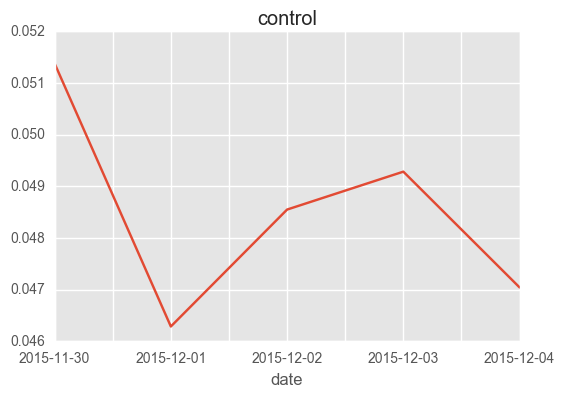

In [143]:
control_spain.groupby('date').mean()['conversion'].plot(title ='control')

In [144]:
date_spain_ratio = test_spain.groupby('date').mean()['conversion']/control_spain.groupby('date').mean()['conversion']

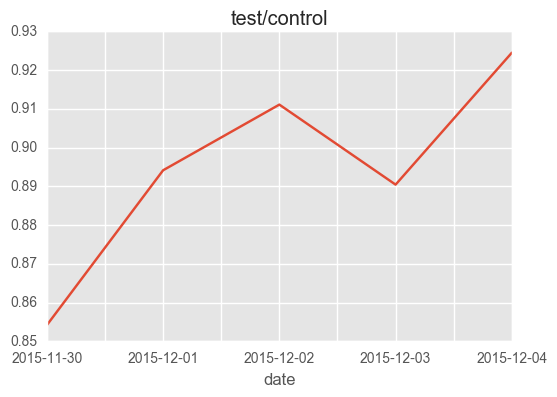

In [145]:
date_spain_ratio.plot(title ='test/control')

Looking at the per country comparison test

Mexico
If the P-value is greater than alpha: 0.05, do not reject the null hypothesis.
ttest_ind:  t = 1.38667  p = 0.165544
Do not reject null hypothesis
('test', 0.05118630882924932)
('control', 0.04949461913438926)
------------------------------
Venezuela
If the P-value is greater than alpha: 0.05, do not reject the null hypothesis.
ttest_ind:  t = -0.562614  p = 0.573702
Do not reject null hypothesis
('test', 0.04897830870795347)
('control', 0.05034367453093071)
------------------------------
Bolivia
If the P-value is greater than alpha: 0.05, do not reject the null hypothesis.
ttest_ind:  t = -0.359958  p = 0.718885
Do not reject null hypothesis
('test', 0.04790096878363832)
('control', 0.04936936936936937)
------------------------------
Colombia
If the P-value is greater than alpha: 0.05, do not reject the null hypothesis.
ttest_ind:  t = -0.799992  p = 0.423719
Do not reject null hypothesis
('test', 0.05057096247960848)
('control', 0.052089486119314826)
--------------------------

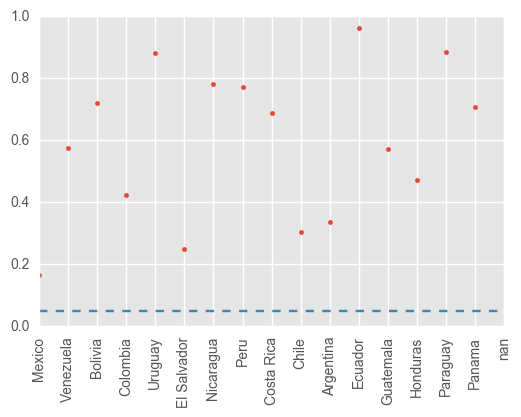

In [146]:
ps = []
countries = []
for country in spain_out_test_df['country'].unique():
    print(country)
    control = control_spain[control_spain['country'] == country]['conversion']
    test = test_spain[test_spain['country'] ==country]['conversion']
    t,p = a_b_test(test,control)
    ps.append(p)
    countries.append(country)
    print('test',test.mean())
    print('control',control.mean())
    print('------------------------------')
    
plt.plot(ps,'.')
plt.xticks(range(len(ps)),countries,rotation =90)
plt.plot([0.05]*len(ps),'--')
plt.show()